First try in implementing the Klausmeier ODE System and generating synthetic data.

###### [1] Klausmeier, C. A. (1999). Regular and irregular patterns in semiarid vegetation. *Science, 284*(5421), 1826-1828. https://doi.org/10.1126/science.284.5421.1826


In [2]:
cd("C:/Users/lisah/Documents/Repos/ma-code")

In [3]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [4]:
using DifferentialEquations, CSV, DataFrames, Plots

In [5]:
# define spatially homogeneous version of Klausmeier model
function klausmeier!(du,u,p,t)
 du[1] = -u[1] - u[1] * u[2]^2 + p[1]
 du[2] = u[1] * u[2]^2 - p[2] * u[2]
end

klausmeier! (generic function with 1 method)

In [6]:
# try to solve for some prms
u0 = [0.0;4.0]          # initial conditions
tspan = (0.0,29.0)      # start and end point of the time period to be considered
a = 1.1
m = 0.45                # value as in [1]
p = [a;m]

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    saveat=1.0  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, u1=sol[1, :], u2=sol[2, :])  # Modify based on system size


Row,time,u1,u2
,Float64,Float64,Float64
1,0.0,0.0,4.0
2,1.0,0.0897386,3.31339
3,2.0,0.114631,2.8954
4,3.0,0.137911,2.61077
5,4.0,0.158236,2.41403
6,5.0,0.175402,2.27603
7,6.0,0.189257,2.17843
8,7.0,0.200199,2.10862
9,8.0,0.208605,2.05844


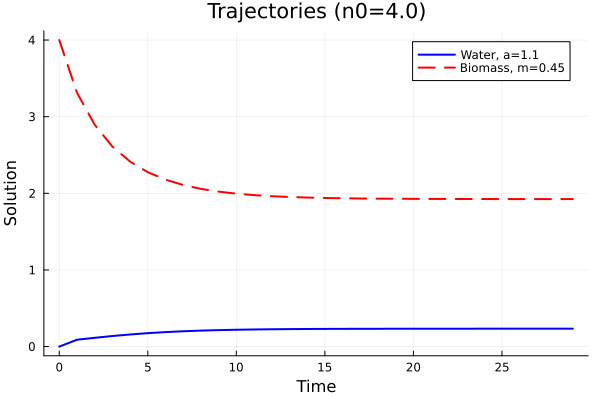

In [7]:
# plot for better visualization
plot(df_sol.time, df_sol.u1, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.u2, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")

In [8]:
# save data to csv
CSV.write("./data/data_a$(a)_ic$(u0[2]).csv", df_sol)


"./data/data_a1.1_ic4.0.csv"